# Analyze open data sets with pandas DataFrames

In this notebook, you'll learn how to use open data from the data sets on the Data Science Experience home page in a Python notebook. You will load, clean, and explore the data with pandas DataFrames. 

Some familiarity with Python is recommended.

The data sets for this notebook are from the World Development Indicators (WDI) data set. The WDI data set is a statistical benchmark that helps measure the progress of human development. The WDI data set draws on data from the World Bank and more than 30 partners. You'll look at seven key development variables, sorted by country and year.

## Learning goals

1. Access data from the Data Science Experience home page.
1. Merge multiple data sets in pandas DataFrames.
1. Structure data for analysis.
1. Generate summary statistics.
1. Create charts with custom formatting.
1. Show relationships between all variables.

## Table of contents
The main parts of this notebook are:
1. [Load data into DataFrames](#load)
    1. [Load the first data set](#first)
    1. [Load another data set](#loadsecond)
    1. [Join the DataFrames](#joindataframes)
    1. [Add more data](#loadmore)
    1. [Create a MultiIndex](#multiindex)
1. [Check the data](#check)
1. [Analyze the data](#analysis)
    1. [Create scatter plots with matplotlib](#matplotlib)
    1. [Create a scatter plot matrix](#matrix)
1. [Next steps](#summary)

<a id="load"></a>
## 1. Load data into DataFrames

To load the data, you obtain access key links and put them into the code to create pandas DataFrames. You will load data into multiple DataFrames and then merge the DataFrames and create a MultiIndex to structure the data for analysis.

<a id="first"></a>
### A. Load the first data set

The first data set that you'll load contains life expectancy data.

To get your access key link and load the first data set:
1. Find the data set and get the access key link:
    1. Create an account (if not already created) on [Data Science Experience](https://datascience.ibm.com)
    1. Browse the DSX catalog and search for "Life Expectancy"; you can also just click the link below.
    1. Click the card with the title [Life expectancy at birth by country in total years](https://apsportal.ibm.com/exchange/public/entry/view/f15be429051727172e0d0c226e2ce895).
    1. Click the link button.
    1. Hover above the link button next to the access key to display the link.
    1. Double-click the link to select it, copy the link, and click **Close**.
    1. Insert the access key link and run the cell to load the data:
    1. In the cell below, replace the **LINK-TO-DATA** string in the `read_csv()` method with the link.
    1. Run the following cell to import the pandas and numpy libraries, rename and load three columns of the data into the DataFrame, and show the first five rows of data.

In [1]:
import pandas as pd
import numpy as np

# life expectancy at birth in years
life = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area','Year','Value'])
life.columns = ['country','year','life']
life = life[~life.life.isnull()].reset_index(drop=True)
life['year'] = life.year.astype(int)
life[0:5]

,country,year,life
0,Afghanistan,2012,60.509122
1,Afghanistan,2011,60.065366
2,Afghanistan,2010,59.600098
3,Afghanistan,2009,59.112341
4,Afghanistan,2008,58.607098


<a id="loadsecond"></a>
### B. Load another data set

The life expectancy figures are more meaningful if you combine them with other data sets. Get an access key link for this data set: [Total population by country](https://apsportal.ibm.com/exchange/public/entry/view/889ca053a19986a4445839358a91963e). Paste your link in the following cell, which loads three columns of the data and prints the number of countries in each data set: 

In [2]:
# population
population = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
population.columns = ['country', 'year','population']
population = population[~population.population.isnull()].reset_index(drop=True)

print "Nr of countries in life:", np.size(np.unique(life['country']))
print "Nr of countries in population:", np.size(np.unique(population['country']))

Nr of countries in life: 238
Nr of countries in population: 245


<a id="joindataframes"></a>
### C. Join DataFrames

As you can see, the two data sets don't fit together perfectly: one contains more countries than the other. When you join two DataFrames, it's common to introduce nulls or NaNs (a value that's not a number when a number is expected) into the resulting DataFrame. 

Use the pandas `merge` function to make the data fit together. In the following cell, the `how='outer'` option specifies to keep the data from the `life` and `population` columns. The `on=['country','year']` option specifies which columns to merge on. To view the options for the `merge` function, see [Merge, join, and concatentate](http://pandas.pydata.org/pandas-docs/stable/merging.html). 

In [3]:
df = life.merge(population, on=['year','country'], how='outer', sort='True')
df[400:405]

,country,year,life,population
400,Nicaragua,1961,47.645659,1830304.0
401,Niger,1961,35.594268,3429301.0
402,Nigeria,1961,37.638268,46144154.0
403,North America,1961,70.368017,202007500.0
404,Northern Mariana Islands,1961,NaN,10340.0


<a id="loadmore"></a>
### D. Add more data 

Add more data about development to the DataFrame. For each data set, you'll include the country and year columns, plus a column that contains the key development variable for that data set. For the employment data set, you'll derive a column from three original columns.

For each of these data sets, get an access key link for the data and paste the link into the appropriate section of the following cell:
* [Population below national poverty line, total, percentage](https://apsportal.ibm.com/exchange/public/entry/view/3a42de810e682d5a83e76fda9fea2bbe)
* [Primary school completion rate % of relevant age group by country](https://apsportal.ibm.com/exchange/public/entry/view/97fc6c420265012ae9b5e9439b9ee293)
* [Total employment, by economic activity (Thousands)](https://apsportal.ibm.com/exchange/public/entry/view/21c789ae4cfadf52f1bb14b5d4a0b99c)
* [Births attended by skilled health staff (% of total) by country](https://apsportal.ibm.com/exchange/public/entry/view/87160cc8374805cb3b07dff4b4f9223e)
* [Measles immunization % children 12-23 months by country](https://apsportal.ibm.com/exchange/public/entry/view/752e36ea889eca360e989baa785c2a5e)

In [4]:
# Population below national poverty line, total, percentage
poverty = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
poverty.columns = ['country', 'year','poverty']
poverty = poverty[~poverty.poverty.isnull()].reset_index(drop=True)
poverty['year'] = pd.to_numeric(poverty.year, errors='coerce')
poverty = poverty[~poverty.year.isnull()].reset_index(drop=True)
poverty['year'] = poverty.year.astype(int)
df = pd.merge(df, poverty, sort=True, on=['country','year'], how='outer')

# Primary school completion rate % of relevant age group by country
school = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
school.columns = ['country', 'year','school']
school = school[~school.school.isnull()].reset_index(drop=True)
school['year'] = pd.to_numeric(school.year, errors='coerce')
school = school[~school.year.isnull()].reset_index(drop=True)
school['year'] = school.year.astype(int)
df = pd.merge(df, school, sort=True, on=['country','year'], how='outer')

# Total employment, by economic activity (Thousands)
employmentin = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value','Sex','Subclassification'])
employment = employmentin.loc[(employmentin.Sex=='Total men and women')&
                              (employmentin.Subclassification=='Total.')]
employment = employment.drop('Sex', 1)
employment = employment.drop('Subclassification', 1)
employment.columns = ['country', 'year','employment']
employment = employment[~employment.employment.isnull()].reset_index(drop=True)
employment['year'] = pd.to_numeric(employment.year, errors='coerce')
employment = employment[~employment.year.isnull()].reset_index(drop=True)
employment['year'] = employment.year.astype(int)
df = pd.merge(df, employment, sort=True, on=['country','year'], how='outer')

# Births attended by skilled health staff (% of total) by country
births = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
births.columns = ['country', 'year','births']
births = births[~births.births.isnull()].reset_index(drop=True)
births['year'] = pd.to_numeric(births.year, errors='coerce')
births = births[~births.year.isnull()].reset_index(drop=True)
births['year'] = births.year.astype(int)
df = pd.merge(df, births, sort=True, on=['country','year'], how='outer')

# Measles immunization % children 12-23 months by country
measles = pd.read_csv("LINK-TO-DATA",usecols=['Country or Area', 'Year','Value'])
measles.columns = ['country', 'year','measles']
measles = measles[~measles.measles.isnull()].reset_index(drop=True)
measles['year'] = pd.to_numeric(measles.year, errors='coerce')
measles = measles[~measles.year.isnull()].reset_index(drop=True)
measles['year'] = measles.year.astype(int)
df = pd.merge(df, measles, sort=True, on=['country','year'], how='outer')

In [5]:
df.head()

,country,year,life,population,poverty,school,employment,births,measles
0,Afghanistan,1960,31.580049,8774440.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,32.095976,8953544.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,32.611878,9141783.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,33.127317,9339507.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,33.641244,9547131.0,NaN,NaN,NaN,NaN,NaN


<a id="multiindex"></a>
### E. Create a MultiIndex

You structure the data for analysis by creating a pandas MultiIndex. A MultiIndex is a hierarchical index that groups the data so that you can easily summarize it.
For example, by grouping by country and then by year, you can plot the average value per country for all years instead of plotting a value for every country for every year.

Run this cell to create a MultiIndex on the country and the year:

In [6]:
df2 = df.set_index(['country','year'])

df2.loc['Afghanistan'].loc[1986:1989]

,life,population,poverty,school,employment,births,measles
year,,,,,,,
1986,45.168805,11262439.0,NaN,NaN,NaN,NaN,14.0
1987,45.997220,11063107.0,NaN,NaN,NaN,NaN,31.0
1988,46.850146,11013345.0,NaN,NaN,NaN,NaN,34.0
1989,47.711585,11215323.0,NaN,NaN,NaN,NaN,22.0


You can see that for the late 1980s, the only data for Afghanistan is about measles immunizations. 

If you are curious about other variables, you can add more WDI data sets from the Data Science Experience home page to this DataFrame. Not all WDI data is properly formatted. You might need to clean the data before you add it. You can reuse the code samples that you just ran. Make sure that you keep checking the results by running commands like `df2[0:10]` on your tables when you load or change them. 

<a id="check"></a>
## 2. Check the data 
You can check the data with the [`describe()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html), which calculates basic summary statistics for each of the columns in the DataFrame (except the country and year columns). 

Run the following cell to show the number of values (count), the mean, the standard deviation (std), the minimum value, three percentiles, and the maximum value for the columns:  

In [7]:
df2.describe()

,life,population,poverty,school,employment,births,measles
count,12196.000000,1.331900e+04,651.000000,5205.000000,2909.000000,1523.000000,6944.000000
mean,63.350227,1.390934e+08,30.763209,78.300466,14337.147966,83.944882,76.452661
std,11.295422,5.405577e+08,17.349350,25.517549,57236.797036,23.885349,22.153693
min,19.504927,4.279000e+03,1.700000,1.522030,0.663000,5.000000,1.000000
25%,55.114793,8.664765e+05,17.245109,61.431550,954.300000,73.650000,65.000000
50%,66.456456,5.434294e+06,26.900000,88.520620,3256.500000,98.000000,84.000000
75%,71.898732,2.592881e+07,43.700000,97.439865,9463.000000,99.700000,94.000000
max,83.480488,7.124544e+09,96.000000,193.263340,737400.000000,100.000000,99.000000


<a id="analysis"></a>
## 3. Analyze the data
Now that you have enough sample data to work with, you can find the correlation between different variables. You'll create scatter plots that each compare two variables. 

<a id="matplotlib"></a>
### A. Create scatter plots with matplotlib

Run the following cell to create two scatter plots that relate the values mount of schooling to life expectancy differences between the United States and India. Use `matplotlib` library commands to create charts with custom font, figure size, and colors. 

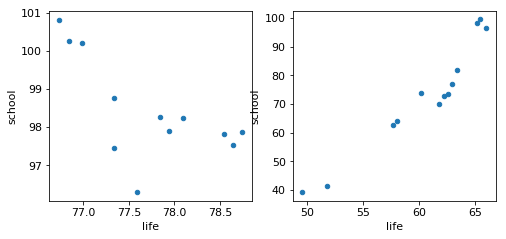

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size']=11
plt.rcParams['figure.figsize']=[8.0, 3.5]
fig, axes=plt.subplots(nrows=1, ncols=2)
df2.loc['United States'].plot(kind='scatter', x='life', y='school', ax=axes[0]);
df2.loc['India'].plot(kind='scatter', x='life', y='school', ax=axes[1]);
plt.show()

The chart on the left shows that in the United States, regardless of year, the literacy rate has hovered above 97, and that it has a negligible effect on life expectancy, which falls between a relatively small rang of 77-79 years.

The chart on the right denotes a significant impact of the availability of education on life expectancy. The higher the amount of schooling, the higher the life expectancy. In this case, the amount of schooling has ranged from 40-100, and the life expectancy has been positively correlated with it, ranging from 50-65 years of age.


<a id="matrix"></a>
### B. Create a scatter plot matrix

You can create charts that show the relationships between all variables with a scatter plot matrix. Each dot represents the average value for one country for all years that have data. 

Run the following cell to create scatter plots and histograms from the DataFrame with the `scatter_matrix()` method. Because the data does not cover the same years, group the data by country (with some loss of data). Many variables are percentages, so convert the employment figures to percentages as well. Drop the `population` column, because you don't need it anymore. 

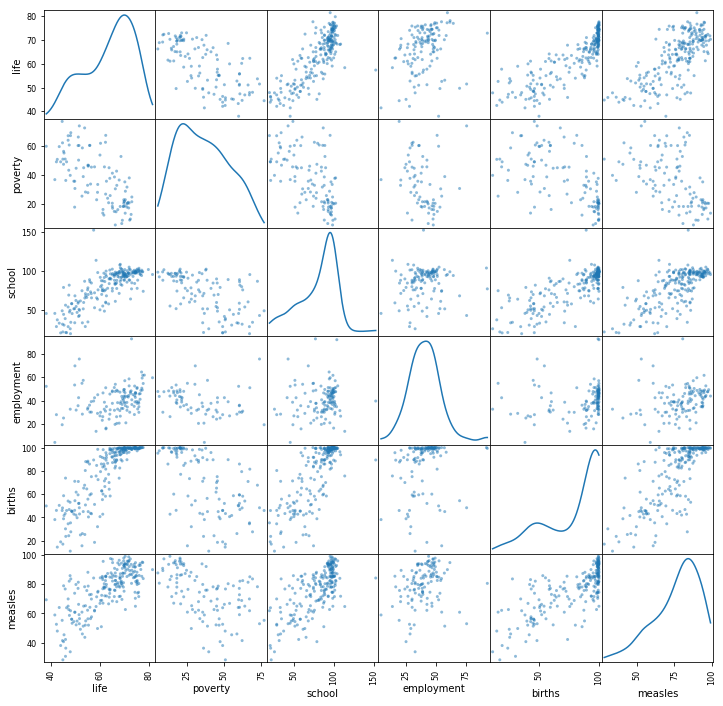

In [9]:
from pandas.plotting import scatter_matrix

# group by country
grouped = df2.groupby(level=0)
dfgroup = grouped.mean()

# employment in % of total population
dfgroup['employment']=(dfgroup['employment']*1000.)/dfgroup['population']*100
dfgroup=dfgroup.drop('population',1)

scatter_matrix(dfgroup,figsize=(12, 12), diagonal='kde')
plt.show()

You can see that the data is now in a pretty good state. There are no large outliers. You start to see some relationships: life expectancy increases with schooling, employment, safe births, and measles vaccination. 

<a id="summary"></a>
## 4. Next steps
You are deriving insights from the data and can now build a statistical model, for example, try an _ordinary least squares_ regression ([OLS](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html)) from [StatsModels](http://statsmodels.sourceforge.net). 

As you can see from this sample notebook, data analysis entails a lot of trial and error. This experimentation can be challenging, but also a lot of fun!

### Author

**Margriet Groenendijk**, PhD, is a Developer Advocate at IBM Cloud Data Services. Currently she is all about data: from storing, cleaning, munging, and analysing to visualising. She creates clear plots and figures to show new insights from diverse data. She uses a range of tools for this, such as IBM Cloudant, IBM dashDB, Apache Spark, and Python notebooks. 

<div class="alert alert-block alert-info"> Note: To save resources and get the best performance please use the code below to stop the kernel before exiting your notebook.</div>

In [ ]:
%%javascript
Jupyter.notebook.session.delete();

<hr>
Copyright &copy; IBM Corp. 2017. Released as licensed Sample Materials.